<a href="https://colab.research.google.com/github/wwalbrecht/stuff4students/blob/main/gitIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro  

Zweck diese Jupyter Notebooks: 

Sie sollen die wichtigsten Kommandos und das Arbeiten mit **git** und **gitlab** kennen lernen. Es geht hier nicht darum, alle Möglichkeiten und die vielen Optionen und Parameter bei den Befehlen zu besprechen.

Warum im Jupyter Notebook?

Sie können sie Befehle für git auch direkt in einer Konsole (Terminal/Shell/Powershell) eingeben. Im Jupyter Notebook geht das aber einfacher und mit Anleitung. Damit das Kommando vom Jupyter Notebook an die Konsole weitergeleitet wird, muss ein Ausrufezeichen "!" davor gestellt werden. Also so: `!git befehltXYZ...` 

Wir können hier auch direkt unsere Beispiel-Dateien anlegen und ändern. Hintergrund: Das machen wir hier aber nicht mit Kommandos von Windows oder Linux, sondern mit Python -- denn das ist dann Plattform-unabhängig. Nebenbei lernen sie noch, wie einfach das mit Python geht.

Hier eine Sammlung von Links:

[visual-git-guide](https://marklodato.github.io/visual-git-guide/index-de.html)

## Nur für die Autoren: Infos zum Stand des Dokuments

Todo: merge  von Hand oder mit Tool


# Install

Die lokale Installation von git ist leider Plattform-abhängig.

Sie können auch die nächste Zelle direkt ausprobieren, vielleicht ist bei ihnen git schon bereit...

Bevor sie unten die Anleitungen für die verschiedenen Plattform finden, installieren sie am besten direkt auch das Tool iplantUML unten.

In [ ]:
!git --version

### Installation von iplantUML 
...um Diagramme in diesem Notebook nutzen zu können.

In [ ]:
%pip install iplantuml
import iplantuml

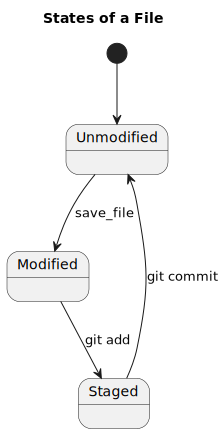

In [2]:
%%plantuml
@startuml
title States of a File

[*] --> Unmodified

Unmodified --> Modified : save_file
Modified --> Staged : git add
Staged --> Unmodified : git commit

Unmodified :
Modified : 
Staged :

@enduml

### Google Colab -- ohne lokale Installation

Dazu brauchen sie ein google-Konto zum Ausführen. (Dabei müssen wir intern auch einen kleinen Umweg über github nehmen.)

<a href="https://colab.research.google.com/github/wwalbrecht/stuff4students/blob/main/gitIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Windows



- Laden Sie den Git-Installer für Windows herunter https://gitforwindows.org/
- Führen Sie den heruntergeladenen Installer aus und folge den Anweisungen im Installationsassistenten.
- Öffnen Sie das Git Bash-Terminal (oder die Eingabeaufforderung/PowerShell) und überprüfen Sie die Installation:

### Linux  


- Öffnen Sie das Terminal.
- Aktualisieren Sie die Paketliste Ihres Systems:

In [ ]:
!sudo apt-get update

- Installieren Sie Git:

In [ ]:
!sudo apt-get install git -y

- Überprüfen Sie die Installation:

In [ ]:
!git --version

### macOS:

- Öffnen Sie das Terminal.
- Installieren Sie Xcode Command Line Tools 

In [ ]:
!xcode-select --install

- Installieren Sie Git mit Homebrew (falls Homebrew installiert ist):

In [ ]:
!brew install git

- Überprüfen Sie die Installation:

In [ ]:
!git --version

#### Falls Homebrew nicht installiert ist, dann folgen Sie folgende Schritte, um es zu installieren.  
- Öffnen Sie das Terminal
- Installieren Sie Homebrew mit folgendem Befehl:

In [ ]:
!/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"

- Folgen Sie den Anweisungen im Installationsassistenten.

# Start Local

Git lokal -- erste Schritte  

Nach ein paar Vorarbeiten legen sie ein lokales git-Repository an und arbeiten damit.

## Vorarbeiten: Ordner & Datei

### Vorarbeit 1: Unter-Ordner für ihre Projekte erstellen und hinein wechseln. 

*Vorsicht: Die nächsten Zellen bitte jeweils nur einmal ausführen, sonst erleben sie ihr geschachteltes Wunder.* 

Für die verschiedenen Übungseinheiten werden wir verschieden Unterverzeichnise anlegen, um jeweils wieder getrennt ein neues git-Repository für die jeweilige Übungseinheiten zu nutzen.

Das Anlegen der Unterverzeichnisse und der Wechsel dort hinein machen wir in den nächsten Code-Zellen mit Hilfe von Python. Sie können aber gerne auch mit dem normalen Datei-Browser mit verfolgen was geschied. Auch die Beispiel Dateien werden direkt via Code-Zellen erstellt - sehen sie sie sich auch gerne zwischendurch mit ihrem Editor an.  

Als erstes sehen wir nach, in welchem aktuellen Arbeitsverzeichnis wir im Dateibaum sind. Sicherheitshalber speichern wir den Pfad.

In [ ]:
# save current working directory; may be used for later restart 
import os
start_cwd= os.getcwd()

In [ ]:
import os
# for info only: get the current working directory and its content:
print("start_cwd: ", os.getcwd())
print("Content: ", os.listdir())

### ggf. für später!!!

*Sie haben die übernächste Zelle mehrfach ausgeführt, oder sich sonstwie im Dateibaum verlaufen? Sie möchten (zu einem späteren Zeitpunkt) in Unterordner neu aufsetzen und alles alte darin löschen? Das Löschen erledigen sie besser in ihrem Datei-Browser. Hier setzten wir nur noch einmal den Start-Pfad auf den ursprünglichen Wert -- falls sie ihn oben gespeichert haben.*

In [ ]:
os.chdir(start_cwd)
print("act. working directory: ", os.getcwd())

Wir legen einen Ordner an für alle lokalen Projekte, die wir im Laufe des Tutorials nutzen.

Darunter dann noch direkt einen Ordner für das erste Projekt mit dem wir gleich starten.
 

In [ ]:
import os

my_proj_folder= "local_projects"
if not os.path.exists(my_proj_folder):
    os.mkdir(my_proj_folder)
os.chdir(my_proj_folder)

my_proj_sub_folder= "project_1"
if not os.path.exists(my_proj_sub_folder):
    os.mkdir(my_proj_sub_folder)
os.chdir(my_proj_sub_folder)

print("new. working directory: ", os.getcwd())
print("Content: ", os.listdir())


### Vorarbeit 2: Eine Datei anlegen:
*...damit es gleich etwas zu archivieren gibt...*

In [ ]:
file1 = open("file_1.txt", "w") # "w" for overwrite, "a" for appending -- if already existend
file1.write("Hello")
file1.close()


In [ ]:
# Check file content:
file1 = open("file_1.txt","r") 
print( file1.read())
file1.close()

AUFGABE: Fügen Sie einige Inhalte zur Datei hinzu und speichern Sie. Öffnen Sie die Datei dazu auch gerne in einem Texteditor.

## git config

Sie müssen ein paar Angaben zu sich bereit stellen, damit diese (spätestens beim ersten commit) mit ihren Änderungen abgespeichert werden können. Die Daten können fiktiv sein. 

Oder sie testen erst einmal, ob für sie schon etwas hinterlegt ist:

In [ ]:
!git config user.email
!git config user.name

In [ ]:
# das könnte ggf. eine längere Liste bei ihnen sein:
!git config --list

...ansonsten setzen sie jetzt ihre Daten..

*Langsam!* Oft steht zwischen 'config' und 'user' noch die Option **--global**, damit es als Default für alle ihre Projekte genutzt wird. Wählen sie...

Falls sie nicht die globale Variante nutzen möchten, dann MUESSEN sie zuerst den nächsten Schritt `git init` unten ausführen. (Außerdem gab es bei der Variante ohne 'global' auch bei Colab ein Problem.)

In [ ]:
!git config user.email "you@example.com"
!git config user.name "Your Name"

**ODER**

In [ ]:
!git config --global user.email "you@example.com"
!git config --global user.name "Your Name"

Es wird früher oder später Vorkommen, dass sie zwischen Windows und Linux hin und her wechseln oder die Dateien in ihrem Projekt gemischte Herkunft haben. Leider gibt es beim Zeilen-Ende-Zeichen einen kleinen Unterschied: \r\n (Win) vs. \n (Linux). [Erklärung dazu aus medium.cum](https://medium.com/@adarshaniket28/how-to-deal-with-the-git-warning-lf-will-be-replaced-by-crlf-54b176c092f5)

Wählen sie für IHRE Plattform:

In [ ]:
# Settings for Unix/Mac, e.g. Colab
!git config --global core.autocrlf input
!git config --global core.safecrlf true

ODER:

In [ ]:
# Settings for Windows
!git config --global core.autocrlf true
!git config --global core.safecrlf true

## git init

Ein Git-Repository initialisieren/anlegen:

In [ ]:
!git init --initial-branch=main

*...ohne Vorgabe zum 'initial-branch' wird der Haupt-Pfad evtl. nicht 'main', sondern 'master' genannt, das ist nicht mehr zeitgemäß. Mehr zu Branches später!* 

In [ ]:
# The repository is inside an (hidden) folder called '.git' of the current working directory. Let's see it:
print( os.getcwd())
print( os.listdir())

Sie können das '.git' Verzeichnis auch gerne mit ihrem Datei-Explorer einmal genauer ansehen; auch z.B. die Datei namens "HEAD" darin. ABER ändern sie nichts "hinten herum" an den internen Verwaltungsdaten von git !!!

## git status

Immer wieder nach dem aktuellen Zustand sehen (und dabei ggf. sogar Tipps von git bekommen...):

In [ ]:
!git status

## git add

In [ ]:
!git add file_1.txt

## git commit  
- Commit erstellen, also erste Version (aktueller Stand) der Datei(en) im Repo. sichern.

In [ ]:
!git commit -m "Ihre Commit-Message (ihre Änderungen) zur Info für das Team."

Wenn sie sich das 'add' vor dem 'commit' sparen möchten, dann können sie beim commit die Option **-a** mit angeben. [Doku. git-scm](https://git-scm.com/docs/git-commit#Documentation/git-commit.txt--a)

*Anregung: Versuchen sie auch einmal ein commit nach Dateiänderung und vergessenem 'add' ...dann sollte sie git höflich auf das Versäumnis hinweisen.*

Eine Datei hat aus der Sicht von git unterschiedliche Zustände. Mit den Befehlen, welchseln sie den Zustand. 

*(Falls das Diagramm nicht angezeigt wird, müssen sie noch die Intialisierung für plantUML oben im Dokument nachholen.)*

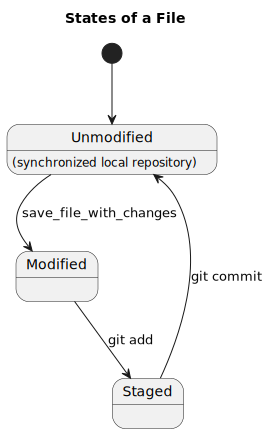

In [3]:
%%plantuml
@startuml
title States of a File

[*] --> Unmodified

Unmodified --> Modified : save_file_with_changes
Modified --> Staged : git add
Staged --> Unmodified : git commit

Unmodified : (synchronized local repository)
Modified : 
Staged :

@enduml

Dieser Zyklus wird für jede (kleinere oder größere) Änderung immer wieder durchlaufen. 

Jeder commit wird dabei mit einer (sehr langen) eindeutigen ID gekennzeichnet (dem sogenannten SHA-1 Hash).

Wie in folgenden Diagramm wird oft nur der Anfang der ID benötigt, um die verschiedenen Commits auseinander zu halten.
(Für jedes Wort das in einer Datei geändert wird, nutzt man natürlich nicht immer ein commit.)

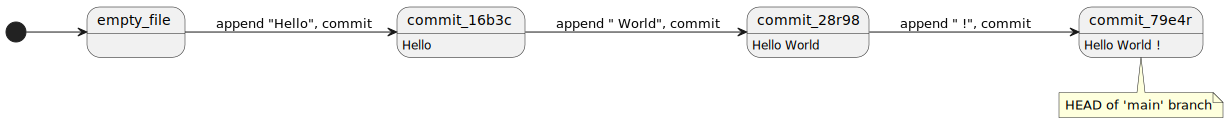

In [4]:
%%plantuml
@startuml
left to right direction

[*] --> empty_file
empty_file --> commit_16b3c : append "Hello", commit
commit_16b3c --> commit_28r98 : append " World", commit
commit_28r98 --> commit_79e4r : append " !", commit

empty_file : 
commit_16b3c : Hello
commit_28r98 : Hello World
commit_79e4r : Hello World !

note bottom of commit_79e4r: HEAD of 'main' branch

@enduml

In [ ]:
file1 = open("file_1.txt", "a") # "w" for overwrite, "a" for appending -- if already existend
file1.write(" World !\n") # avoid extra commit for '!'
file1.close()

In [ ]:
!git add .
!git commit -m "Completed the frist line"

## git log
- Infos zum Commit anzeigen; vgl. auch git status von oben 

In [ ]:
!git log
#!git log --oneline  #kompakter

## git diff

Den Unterschied anzeigen lassen.

### git diff (((--staged)))

Gibt es etwas, das noch auf einen neues add oder commit wartet? 

Gleich vorweg: Wenn das diff Kommando keine Ausgabe liefert, dann gibt es zwischen den betrachteten Dateien/Versionen/Zuständen kein Unterschied. 

Zunächst eine kleine Ergänzung in der Beispiel-Datei...

In [ ]:
file1 = open("file_1.txt", "a") # 
file1.write("\nEine neue Zeile.\n")
file1.close()

In [ ]:
# Check file content:
file1 = open("file_1.txt","r") 
print( file1.read())
file1.close()

In [ ]:
!git diff

*...falls da ein Unterschied angezeigt wird, dann ist es vielleicht Zeit die Datei für den nächsten Commit **vorzubereiten**...*

Wenn mehrere Dateien im Projekt sind, dann können sie den Vergleich auch einschränken: 

`git diff file_1.txt`

In [ ]:
!git add .

*...und dann wollen sie vielleicht vor dem nächsten Commit noch einmal anzeigen lassen, was sie geändert haben...*

In [ ]:
!git diff --staged

In [ ]:
!git commit -m "Added another line"

AUFGABE: Führen sie die letzten Code-Blöcke gerne auch in unterschiedlicher Reihenfolge noch einmal aus, damit sie den Unterschied mit und ohne '--staged--' sehen.

### git diff 43cfc

Wie können sie im Nachhinein den Unterschied zwischen zwei Commits nachsehen?

Eine gute Aufgabe für die Commit IDs (bzw. ihre Anfangszeichen): ....

Geben sie die ersten Zeichen eines bei *git log* oben angezeigten commits an. (Wenn sie es mit dem HEAD vergleichen wollen.)

In [ ]:
# ...oder hier direkt noch einmal...
!git log

In [ ]:
!git diff 43cfc

...zugegeben: Auf den ersten Blick ist das nicht sehr übersichtlich. Sie können sich daran gewöhnen oder später bessere Darstellungen nutzen.

## TODO 

Checkout auch schon für alten Commit nutzbar. Vorsicht Gefahr, falls dann darauf geändert wird. Optionen: (a) force oder (b) branch erstellen (später)  Wichtig: Das wird später auch beim HandsOn-Training im Kurs benutzt! 

## AUFGABE

AUFGABE: Ändern sie den Date-Inhalt (in ihrem Editor) und machen ein neues Commit. Den Code dazu können sie hier unterbringen. (Oder sie arbeiten auf einem Terminal -- dann achten sie aber darauf, dass sie sich im richtigen Verzeichnis befinden.)  

In [ ]:
!git ...

AUFGABE: Legen sie eine weitere Datei an und fügen sie zum Repo. hinzu. 

In [ ]:
!git ...

Erstellen sie auch wieder commits und sehen sich den log und diff an. 

Zusatzfrage: Erkennen sie, dass ein commit immer für alle Dateien gilt, auch wenn nur eine gerade geändert wurde?

# git branch & merge local

Motivation: Benötigen Sie (vorübergehend) zwei Entwicklungspfade? 

...für mehrere unterschiedliche Features, die sie in ihre Software einbauen möchten? 

...womöglich von zwei unterschiedlichen Team-Mitgliedern?

*Dann ist es Zeit für Branches!*

Es folge ein Beispiel dazu: Schritt für Schritt

Szenario: Nachdem eine Grundversion in einer Datei vorliegt, entwickelt eine Person die 'baseline' weiter und (evtl.) eine andere Person fügt Zeilen bzgl. eines neuen Features (der SW oder hier eben nur einzelne Textzeilen) hinzu. 

Zunächst eine Skizze, wo wir hin wollen...

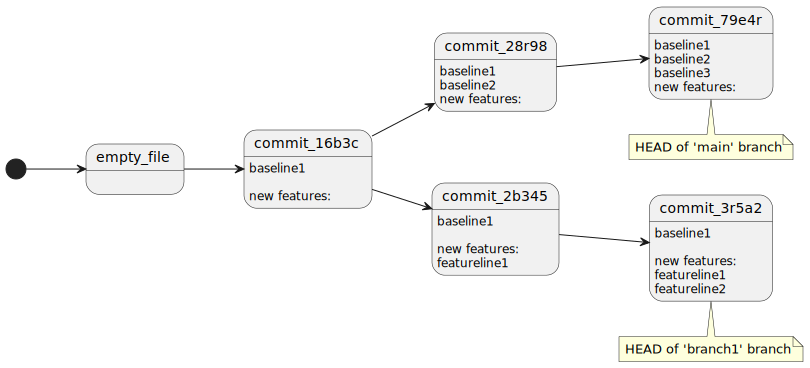

In [5]:
%%plantuml
@startuml
left to right direction

[*] --> empty_file
empty_file --> commit_16b3c 
commit_16b3c --> commit_28r98 
commit_28r98 --> commit_79e4r 
commit_16b3c --> commit_2b345 
commit_2b345 --> commit_3r5a2


empty_file : 
commit_16b3c : baseline1\n\nnew features:
commit_28r98 : baseline1\nbaseline2\nnew features:
commit_79e4r : baseline1\nbaseline2\nbaseline3\nnew features:

commit_2b345 : baseline1\n\nnew features:\nfeatureline1
commit_3r5a2 : baseline1\n\nnew features:\nfeatureline1\nfeatureline2


note bottom of commit_79e4r: HEAD of 'main' branch
note bottom of commit_3r5a2: HEAD of 'branch1' branch


@enduml

### Vorarbeiten im Dateibaum

Aus dem Unterverzeichnis wieder hoch ins Start-Verzeichnis wechseln, denn dort wird gleich ein neuer Ordner mit einem neuen Projekt vorbereitet.

Zunächst sehen sie sich an, wo sie gerade sind...

In [ ]:
import os
print("act. working directory: ", os.getcwd())
print("Content: ", os.listdir())

print("start_cwd was: ", start_cwd)

*...wenn das 'start_cwd' korrekt gespeichert ist, dann mit der nächsten Zelle dort hin wechseln.*

(Alternative können Console-Fans auch das cd-Kommando in einer Zelle absetzten...auch wieder mit '!' davor.)

In [ ]:
os.chdir(start_cwd)
print("act. working directory: ", os.getcwd())

Wir legen einen Ordner "merge_example" unterhalb von "local_projects" an. 

In [ ]:
import os

my_proj_folder= "local_projects"
if not os.path.exists(my_proj_folder):
    os.mkdir(my_proj_folder)
os.chdir(my_proj_folder)

my_proj_sub_folder= "merge_example"
if not os.path.exists(my_proj_sub_folder):
    os.mkdir(my_proj_sub_folder)
os.chdir(my_proj_sub_folder)

print("new. working directory: ", os.getcwd())
print("Content: ", os.listdir())



Eine Datei vorbereiten:

Damit das automatische Zusammenführen später gut klappt, ist die Datei direkt in mehrer **Absätze** gegliedert. In einer Datei mit Programmcode sind z.B. später auch mehrere Funktionen und die Entwickler arbeiten gleichzeitig an (hoffentlichen) verschiedenen Funktionen. (Oder noch besser auf verschiedenen Dateien.)    

Sie müssen folgende Zelle laufen lassen, damit die Datei geschrieben wird. 

Hintergrund: Wir nutzen hier etwas die Magie der Jupyter Notebooks, sogenanne [cell-magics und line-magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

In [ ]:
%%writefile file_1.txt 
baseline1


new features:


*(Falls sie nachsehen wollen, ob das geklappt hat, dann gerne via Datei-Explorer oder die nächste Zelle ausführen.)*

In [ ]:
%cat file_1.txt

### init, commit und branch 

In [ ]:
!git init --initial-branch=main

In [ ]:
!git add file_1.txt
!git commit -m "Add file_1.txt with baseline and room for new features"

Einen Zweig anlegen und dort weiter entwicklen...

In [ ]:
# Neuen Entwicklungspfad anlegen:
!git branch branch1

In [ ]:
# In den Entwicklungspfad wechseln:
!git switch branch1

Noch ist der Dateiinhalt unverändert -- wenn sie es nicht glauben, dann sehen sie nach...

In [ ]:
%cat file_1.txt

### Update in branch1

Im Branch wird am neuen Feature gearbeitet...zwei Zeilen angehängt (vgl. Optin -a)

In [ ]:
%%writefile -a file_1.txt 
featureline1
featureline2


Jetzt gerne noch einmal nachsehen im branch1:

In [ ]:
%cat file_1.txt

In [ ]:
!git commit -a -m "add featureline1 and 2"

IHRE AUFGABE: Ergänzen sie noch das Richtige am Ende des Kommandos!

Wir wollen zurück zum main-Pfad. 

### Update in main

In [ ]:
!git switch 

Jetzt noch einmal nachsehen im main-Branch!
...wundern sie sich?

In [ ]:
%cat file_1.txt

Der direkte Vergleich von main aus...

In [ ]:
!git diff branch1

Um etwas echte Projektarbeit nachzuahmen, ergänzen wird jetzt auch noch im main-Pfad eine weitere 'baseline2'...

In [ ]:
%%writefile file_1.txt 
baseline1
baseline2

new features:


In [ ]:
!git commit -a -m "add baseline2 in main-branch"


In [ ]:
!git diff branch1

### merge (automatisch)

Die Änderungen im branch1 sind gut (und getestet!?); wir wollen sie im main-Pfad (für den nächsten SW-Release) übernehmen:

In [ ]:
!git merge branch1 -m "my first (hopefully automatic) merge"

In [ ]:
%cat file_1.txt


### merge (von Hand) TODO

Wenn das automatische Merge nicht klappt, dann wird es etwas aufwendiger. 

- Sie können die mit Markierungen versehene Datei(en) von Hand editieren.
- Oder sie nutzen ein graphisches Tool.

- Todo: Anleitung oder Verweis einfügen.

# Gitlab Global

Ziel: Ein Repository in der Cloud synchronisieren.

*Zuerst das Huhn oder das Ei?*

local --> gitlab: Sie können entweder zuerst (wie eben) mit einem lokalen Repository starten und es dann in die Cloud (gitlab) 'pushen'.

Oder

gitlab --> local: Sie legen ihr lokales Repository als 'clone' eines Repositories aus der Cloud an. 

## local --> gitlab

Ziel: Ein lokales Repo zu gitlab pushen

Damit das funktioniert, müssen in ihrer Installation auch die Keys/Credentials hinterlegt sein, damit git diese nutzen kann um "Schreib-Berechtigung" in gitlab zu besitzen. 

Todo: Das ist hier noch nicht für alle Fälle getestet. In Colab geht es besser (oder nur mit github statt gitlab).

Wir sehen erst einmal nach, ob evtl. schon etwas bzgl. des Remote Repositries im lokalen Projekt hinterlegt ist:

In [ ]:
!git remote -v

*...keine Ausgabe? Dann ist noch nichts hinterlegt. Unter **'origin'** wird lokal gespeichert, wohin in die Cloud synchronisiert werden soll...das ist aber wahrscheinlich auch noch nicht gesetzt -- also wundern sie sich nicht über die (Fehler-)Ausgabe...* 

In [ ]:
!git remote show origin

Das Repo. in die Cloud hoch-schieben:

Vorarbeit: Später gibt es oft mehrer Entwicklungspfade 'branches'. Welches ist der Hauptast/Stamm im Baum? Früher (und je nach Installation auch heute) wird der Stamm 'master' genannt. Besser ist es, ihn 'main' zu nennen. Sehen sie einmal nach und führen ggf. auch die übernächste Zelle zum Ändern aus! 

In [ ]:
!git status

In [ ]:
!git branch -m master main

Jetzt können sie den upstream vornehmen. Sie können dabei einen Namen für das Projekt festlegen.

In gitlab ist für diese Test-Projekte ein Unterverzeichnis alab/cpp/tmp4test vorbereitet. In gitlab nennt man solche Unterverzeichnise 'subgroup' -- die können sie später auch selbst anlegen.

*Da wahrscheinlich schon andere den Namen 'project_1' genutzt haben, verwenden/vergeben sie hier einfach einen anderen, z.B: 'myemail_proj1'*

In [ ]:
!git push --set-upstream https://gitlab.uni-koblenz.de/alab/cpp/tmp4test/project_1.git main

In [ ]:
!git remote add origin  https://gitlab.uni-koblenz.de/alab/cpp/tmp4test/project_1.git

*Sehen sie sich ihr Projekt im Browser an!* (ggf. Namen anpassen!)

In [ ]:
import webbrowser
url = 'https://gitlab.uni-koblenz.de/alab/cpp/tmp4test/project_1.git'
webbrowser.open(url)

### diff  

Mit git diff die Unterschiede zwischen der lokalen Version und der Remote-Version anzuzeigen.

Änderne sie lokal oder global und versuchen es (noch einmal).

Falls die Ausgabe zu lang wird, dann hängen sie z.B. folendes hinten an den Befehlt:  `file_1.txt`

In [ ]:
!git diff origin/main

## gitlab --> lokal

GitLab-Projekt erstellen und dann clonen
- Gehen Sie zu GitLab (https://gitlab.com/) und loggen Sie sich ein.
- Erstellen Sie ein neues Projekt.

Oder clonen sie erste einmal ein schon vorhandenes Projekt.

Auf jeden Fall sollten sie jetzt ein neues lokales Verzeichnis anlegen und nutzen, denn im aktuellen Verzeichnis liegt ja (wahrscheinlich) schon ein Repository für die bisherigen Übungen. 

Sehen sie sich am besten erst noch einmal an, wo sie sich gerade befinden.

### Vorarbeiten im Dateibaum

Aus dem Unterverzeichnis wieder hoch ins Start-Verzeichnis wechseln, denn dort wird gleich ein neuer Ordner mit einem neuen Projekt aus gitlab erstellt /ge-cloned.

In [ ]:
import os
print("act. working directory: ", os.getcwd())
print("Content: ", os.listdir())

print("start_cwd was: ", start_cwd)

*...wenn das 'start_cwd' korrekt gespeichert ist, dann mit der nächstn Zelle dort hin wechseln.*

(Alternative können Console-Fans auch das cd-Kommando in einer Zelle absetzten...auch wieder mit '!' davor.)

In [ ]:
os.chdir(start_cwd)
print("act. working directory: ", os.getcwd())

### git clone

Das wohl wichtigeste Kommando: Eine lokale Kopie von einem bestehenden git-Projekt erstellen.

In [ ]:
!git clone https://gitlab.uni-koblenz.de/alab/cpp/cpphandson/handsonparameter

In [ ]:
print("Content: ", os.listdir())

## Todo zu Überarbeiten - bitte noch nicht nutzen!

### Repository mit GitLab verknüpfen:  
- Fügen Sie den GitLab-Remote hinzu:
- Hinweis: Ersetzen Sie IHRE_GITLAB_REPO_URL durch die URL Ihres GitLab-Projekts.

In [ ]:
!git remote add origin IHRE_GITLAB_REPO_URL

- PusheN Sie das Repository zu GitLab:
- Hinweis: Hierbei könnte es sein, dass Sie sich mit Ihrem GitLab-Anmeldeinformationen authentifizieren mussen.

In [ ]:
!git push -u origin master

# Misc

## Alternativen bzgl. checkout & switch & Co.. 

**ACHTUNG:** Die Zellen unten sind (noch nicht) zum Ausführen gedacht, weil der Zustand des Repos oft noch nicht passt.

In [ ]:
# Anlegen und Verzweigen auf einmal mit Option -b
!git checkout -b branch-1

In [ ]:
# Alternativ geht es neuerdings auch so:
!git switch -c branch-1
# diesmal mit -c für das direkte **C**reate des Pfades
# switch hat ein paar Optionen (und damit auch Gefahren) weniger als checkout

#### Zum vorherigen Commit zurückkehren:

In [ ]:
!git checkout - //oder !git switch -

#### Zum neuesten Commit auf dem aktuellen Branch zurückkehren:

In [ ]:
!git checkout HEAD //oder git switch HEAD

#### Eine Datei in einem bestimmten Commit wiederherstellen:

In [ ]:
!git checkout COMMIT_HASH -- dateiname //oder git switch COMMIT_HASH -- dateiname

### Via Commit HASH wechseln  

In [ ]:
!git checkout COMMIT_HASH // Oder !git switch COMMIT_HASH

Ersetzen Sie COMMIT_HASH durch die tatsächliche Commit-Hash-Zeichenfolge, die Sie wechseln möchten. Sie können den Commit-Hash aus dem git log-Befehl oder aus der Git-Web-Oberfläche extrahieren.  
Hinweis:  
`git log`, dieser Befehl zeigt eine Liste der jüngsten Commits an, wobei jeder Commit von einem Hash begleitet wird. Der neueste Commit steht oben. Sie können den Hash des gewünschten Commits kopieren und dann für den git checkout- oder git switch-Befehl verwenden.

### Delete the 'feature' branch

In [ ]:

!git branch -d feature

# Testaufgabe

Todo: selbst Testen durch Dozenten -- oder Mutige vor!

- Erstellen Sie durch das Terminal eine Repo bzw. ein Projekt namens Git_Projekt.
- Wechseln Sie zum erstellten Ordner.
- Erstellen Sie eine Datei mit dem Inhalt "Hallo!".
- Erstellen Sie ein Projekt auf GitLab.
- Verbinden Sie Ihre lokale Repo mit Ihrem Projekt auf GitLab.
- Durch Git laden Sie die erstellte Datei auf GitLab hoch.
- Ändern Sie den Inhalt der Datei zu "Meine zweite commit" .
- Fragen Sie den Unterschied zwischen lokaler und remoter Repo.
- Fragen Sie den status.
- Laden Sie die neu geänderte Datei hoch.
- Wechseln Sie zur ersten Version.
- Wechseln Sie zurück zum neusten Version.